# Tutorial on extracting and plotting attention matrices 
1. Load the model and tokenizer 
2. Preprare the input text 
3. Run the inference to get outputs, including attention weights 
4. Extract the attention matrix from a specified layer and head 
5. Visualization of attention matrices as heatmap from matplotlib 

- Tokenizer : ```BertTokenizer```
- Model : ```BertModel```

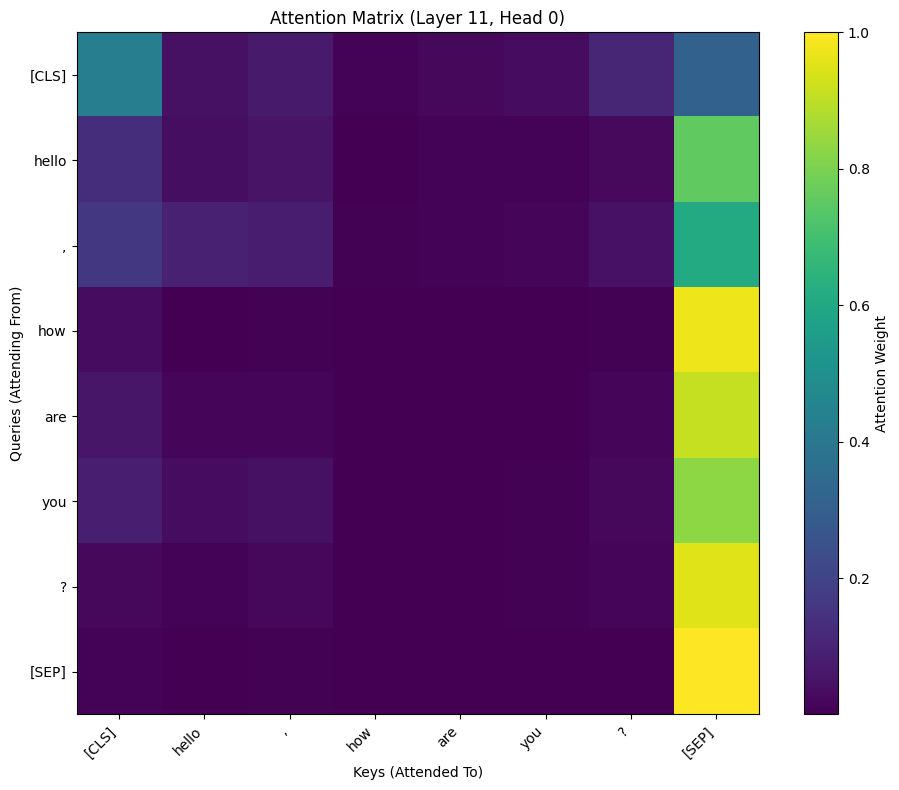


inputs: {'input_ids': tensor([[ 101, 7592, 1010, 2129, 2024, 2017, 1029,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

outputs: BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0824,  0.0667, -0.2880,  ..., -0.3566,  0.1960,  0.5381],
         [ 0.0310, -0.1448,  0.0952,  ..., -0.1560,  1.0151,  0.0947],
         [-0.8935,  0.3240,  0.4184,  ..., -0.5498,  0.2853,  0.1149],
         ...,
         [-0.2812, -0.8531,  0.6912,  ..., -0.5051,  0.4716, -0.6854],
         [-0.4429, -0.7820, -0.8055,  ...,  0.1949,  0.1081,  0.0130],
         [ 0.5570, -0.1080, -0.2412,  ...,  0.2817, -0.3996, -0.1882]]]), pooler_output=tensor([[-0.9397, -0.4081, -0.9024,  0.8667,  0.6076, -0.1782,  0.9319,  0.2685,
         -0.7918, -1.0000, -0.4899,  0.9625,  0.9823,  0.6102,  0.9614, -0.8728,
         -0.6449, -0.6543,  0.3102, -0.6648,  0.7556,  1.0000,  0.0778,  0.3350,
          0.5094,  0.9948, -0.8847, 

In [1]:
# !pip install torch torchvision transformers matplotlib numpy 
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import numpy as np

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Prepare input
text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors='pt')

# Inference
with torch.no_grad():
    outputs = model(**inputs)
attentions = outputs.attentions

# Extract matrix
layer = -1
head = 0
attention_matrix = attentions[layer][0][head].detach().numpy()
attention_matrix /= attention_matrix.max()
# Tokens for labels
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(attention_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Attention Weight')
plt.xticks(np.arange(len(tokens)), tokens, rotation=45, ha='right')
plt.yticks(np.arange(len(tokens)), tokens)
plt.title(f'Attention Matrix (Layer {len(attentions) + layer}, Head {head})')
plt.xlabel('Keys (Attended To)')
plt.ylabel('Queries (Attending From)')
plt.tight_layout()
plt.show()
print(f"""
inputs: {inputs}

outputs: {outputs}
""")

- Tokenizer : ```GPT2MTokenizer```
- Model : ```GPT2Model```
- Plotting of average heads

(7, 7)


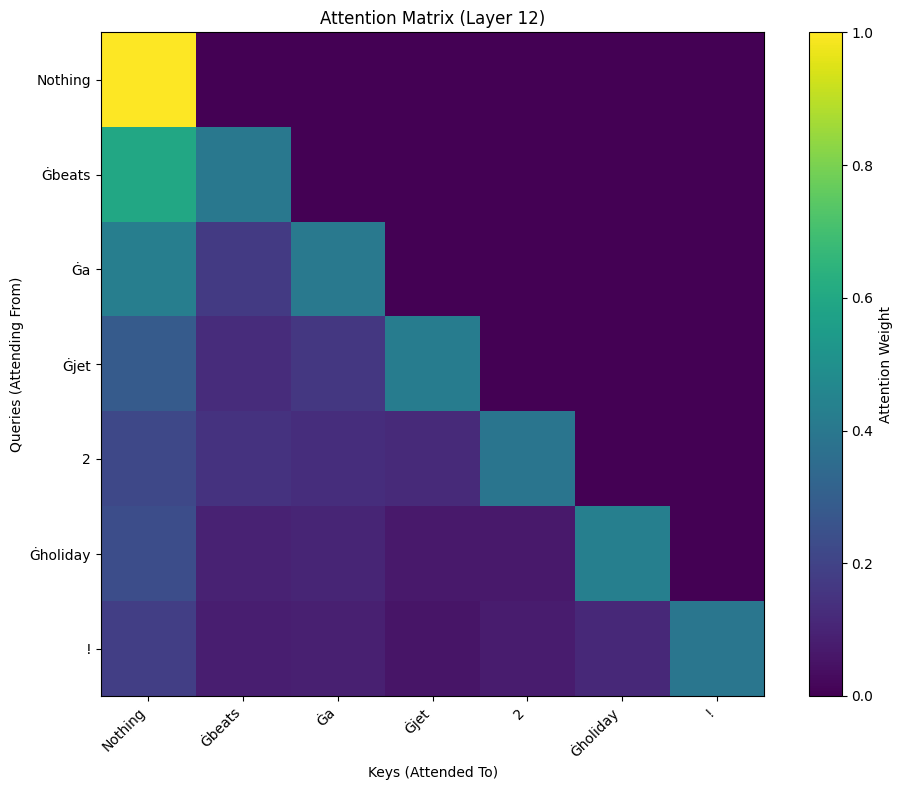

(7, 7)


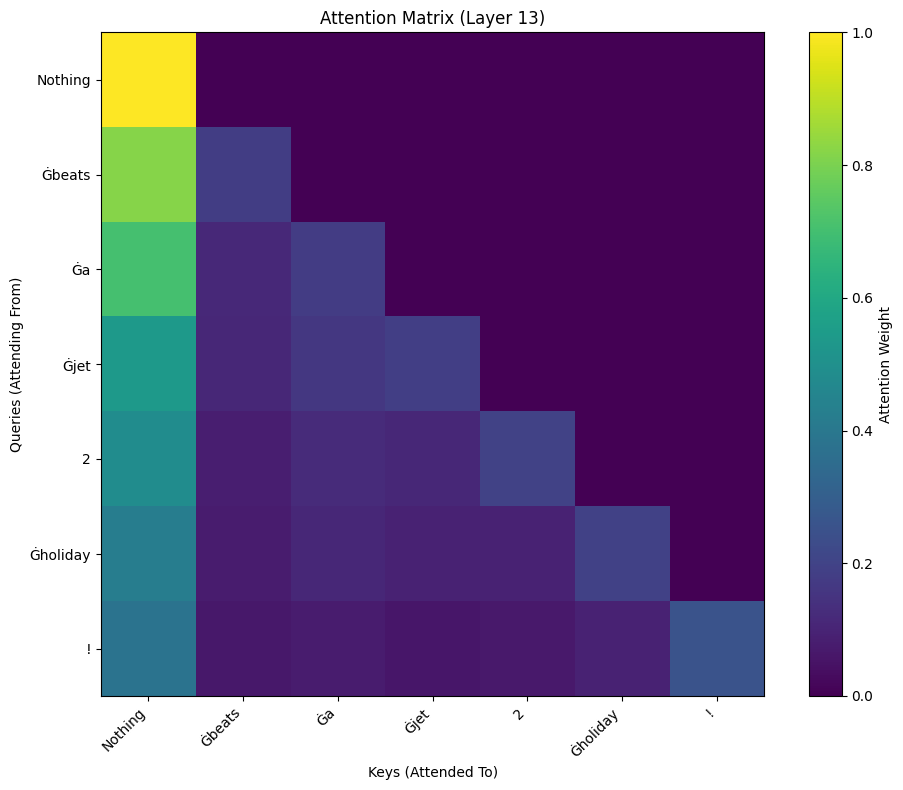

(7, 7)


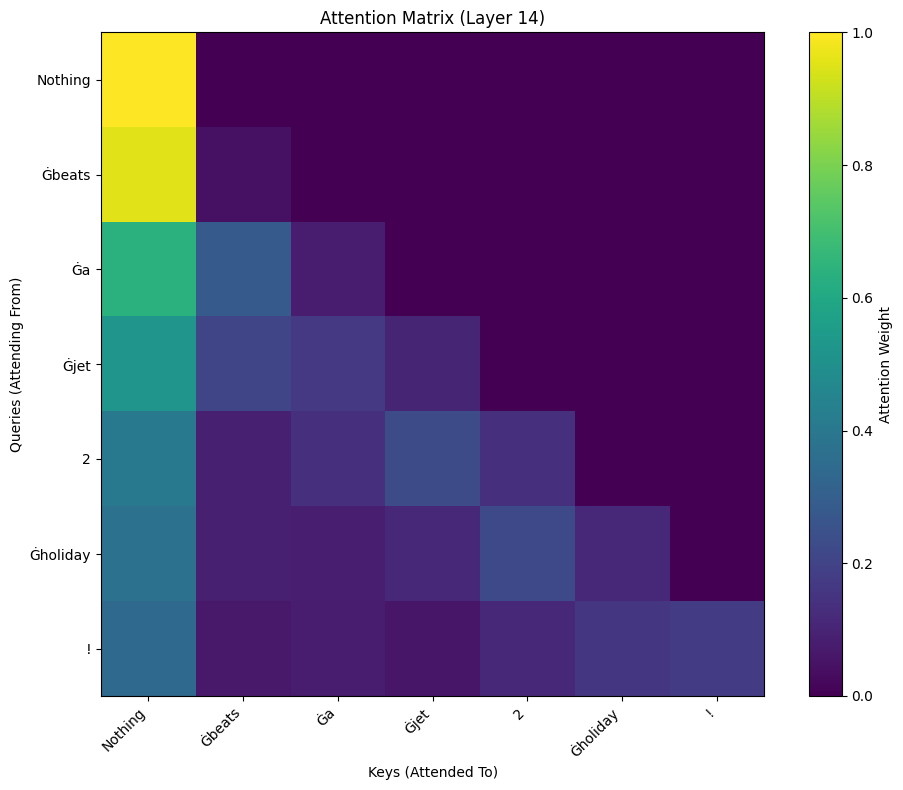

(7, 7)


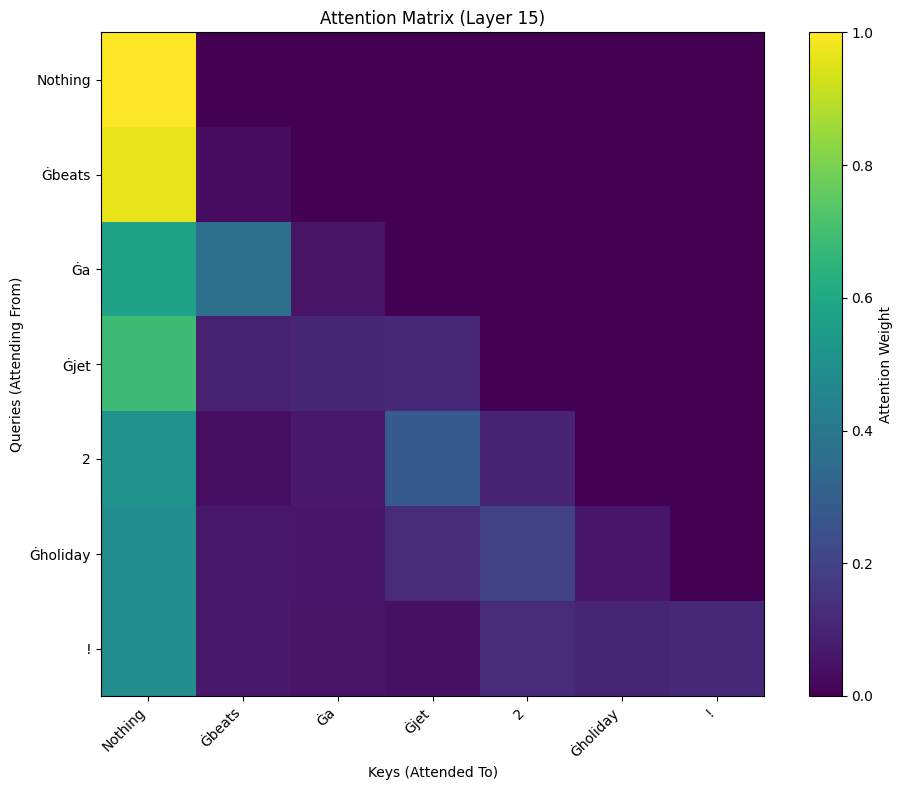

(7, 7)


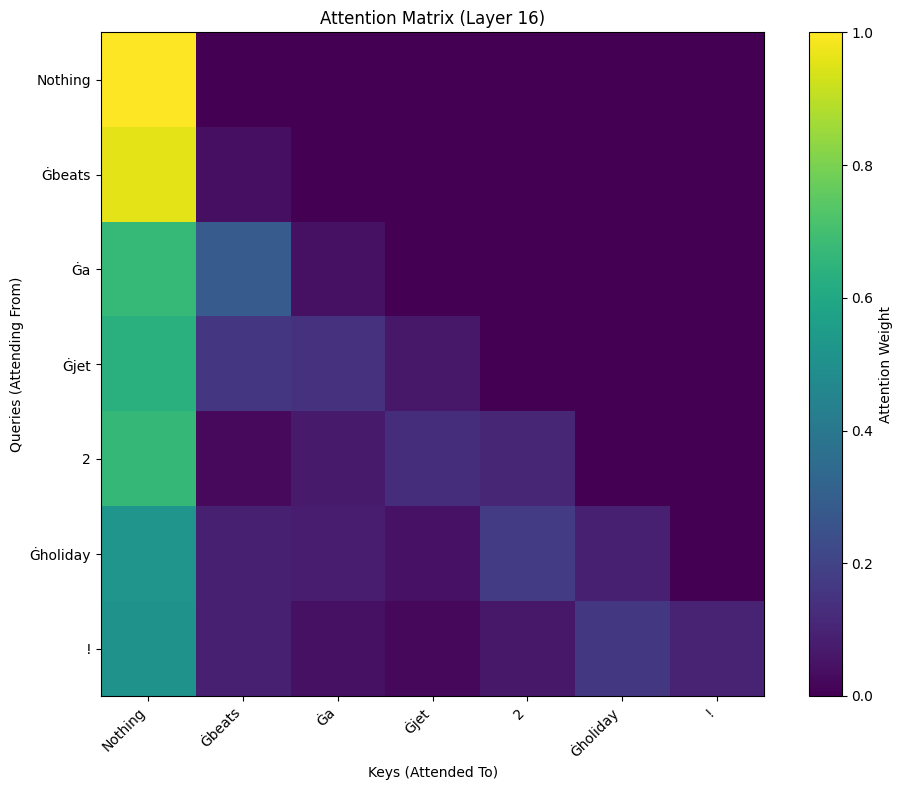

(7, 7)


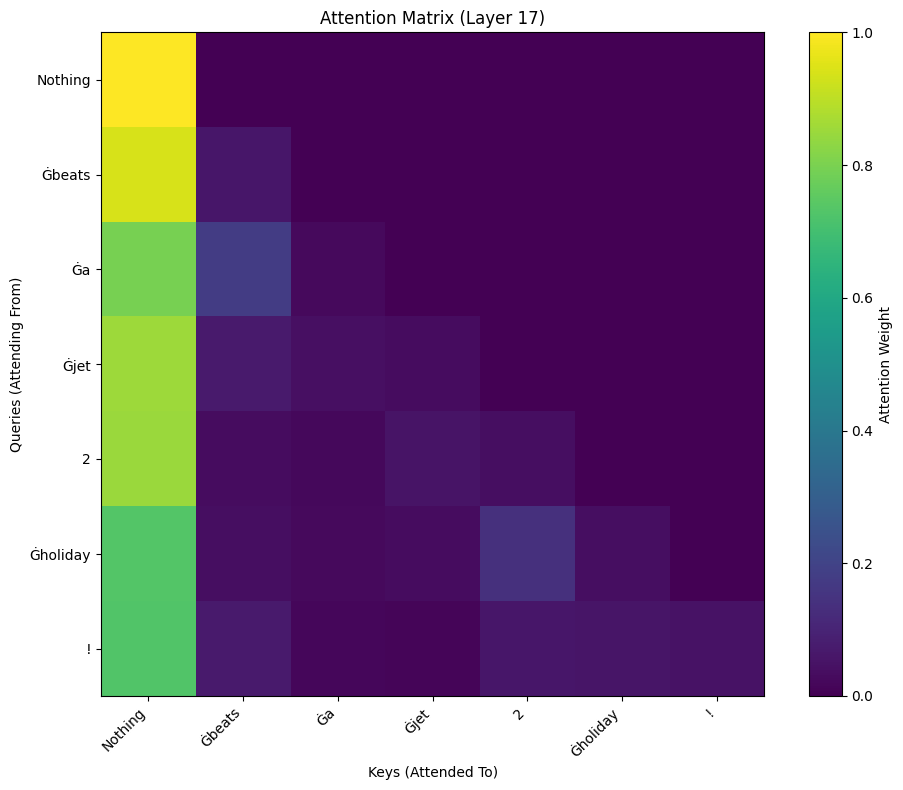

(7, 7)


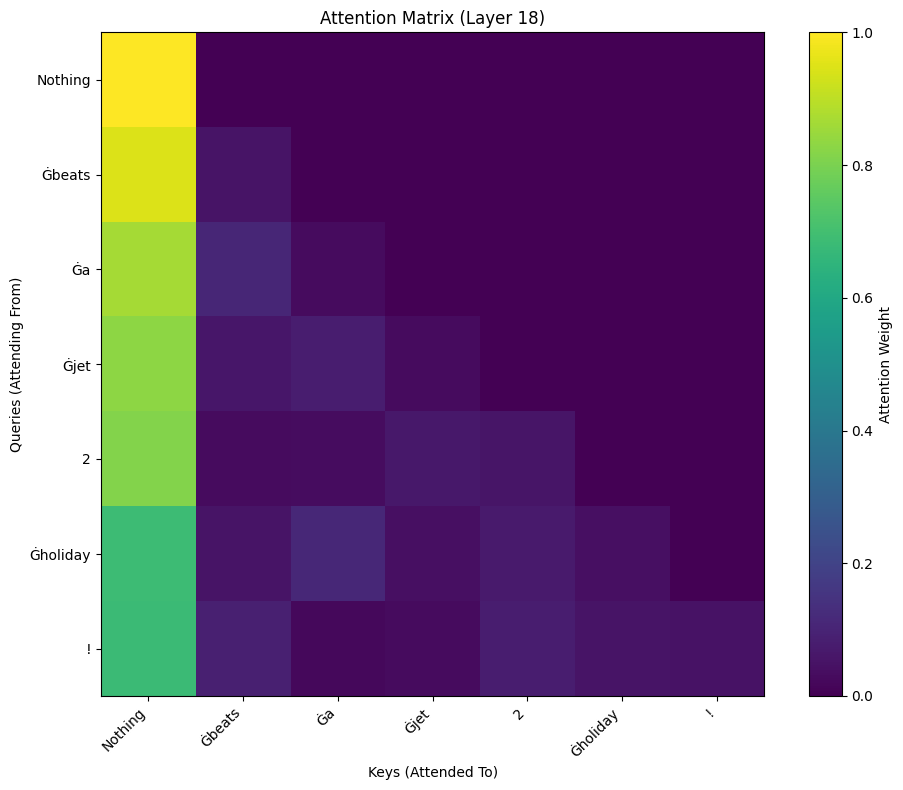

(7, 7)


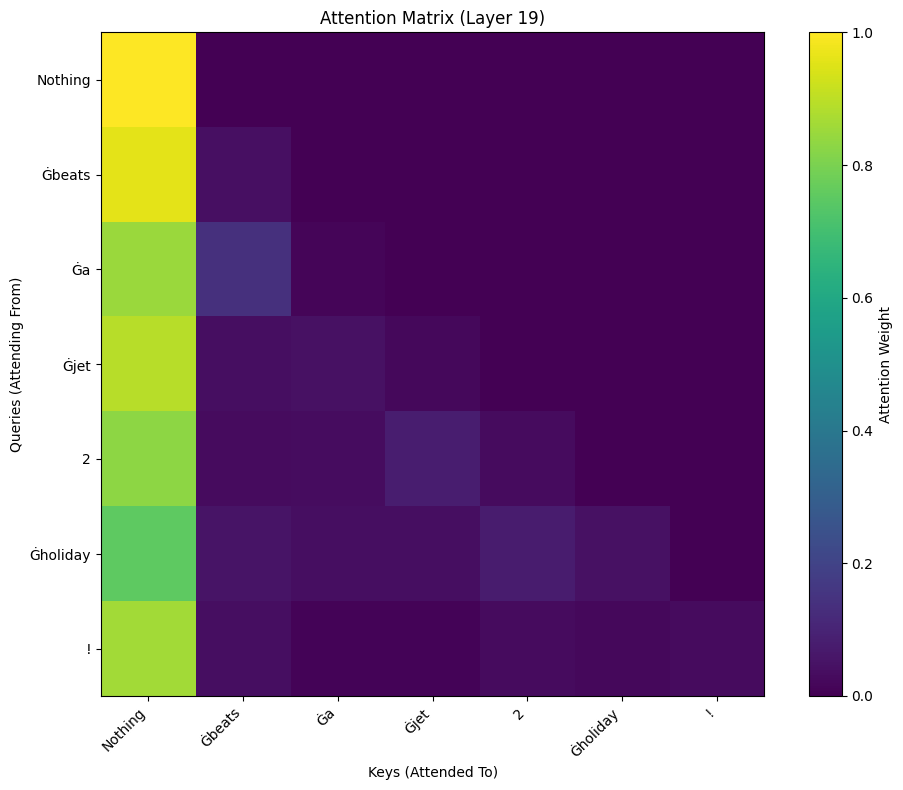

(7, 7)


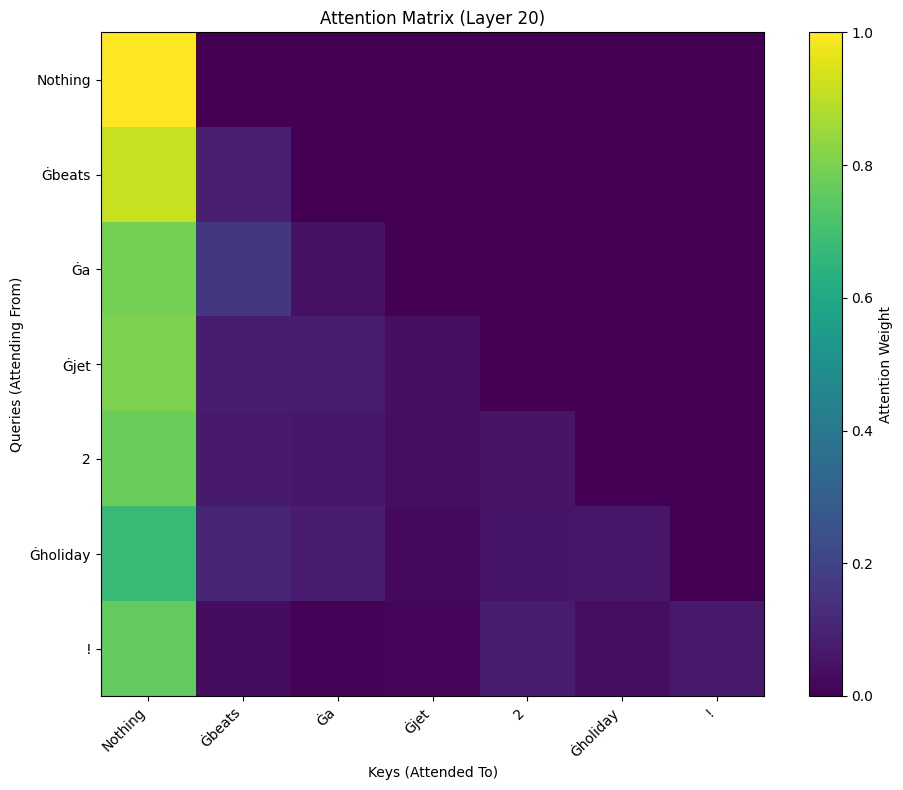

(7, 7)


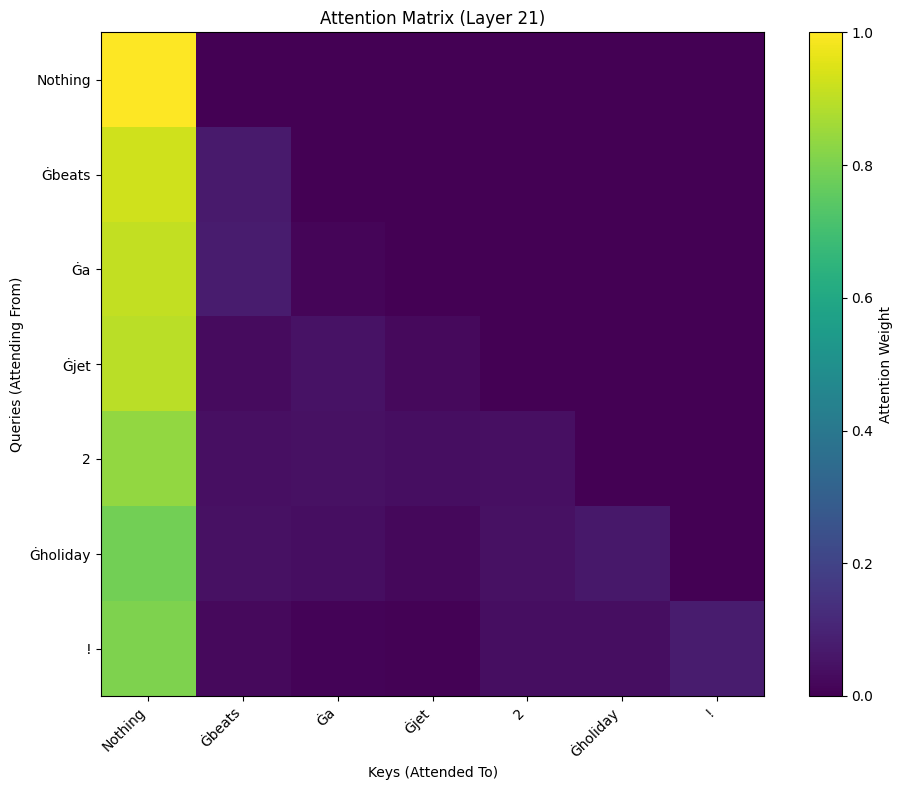

(7, 7)


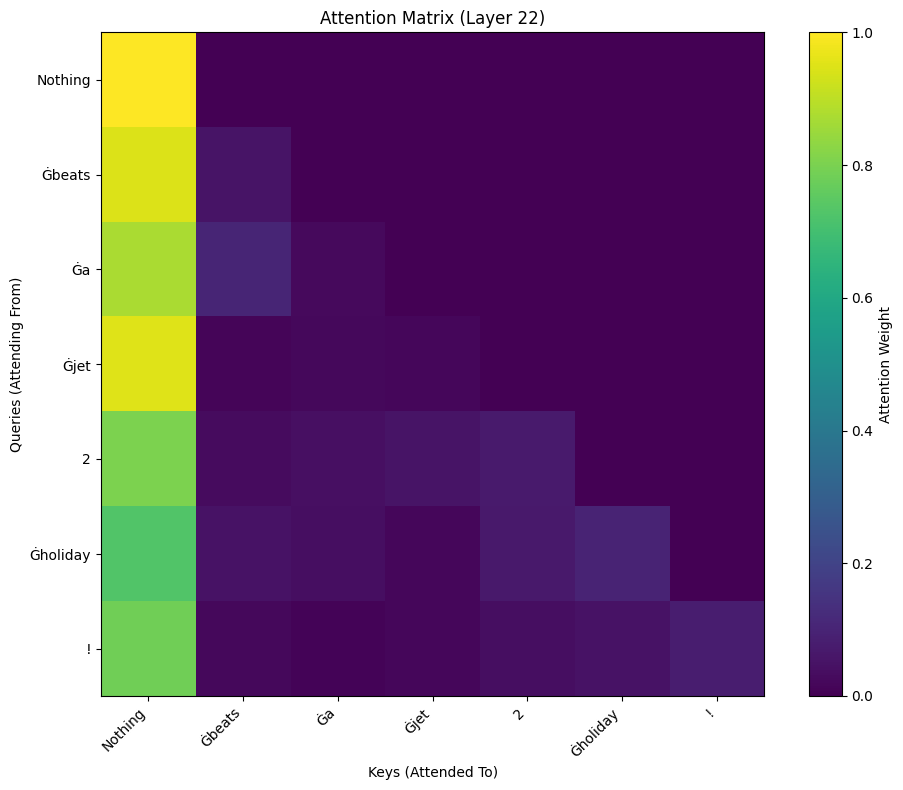

(7, 7)


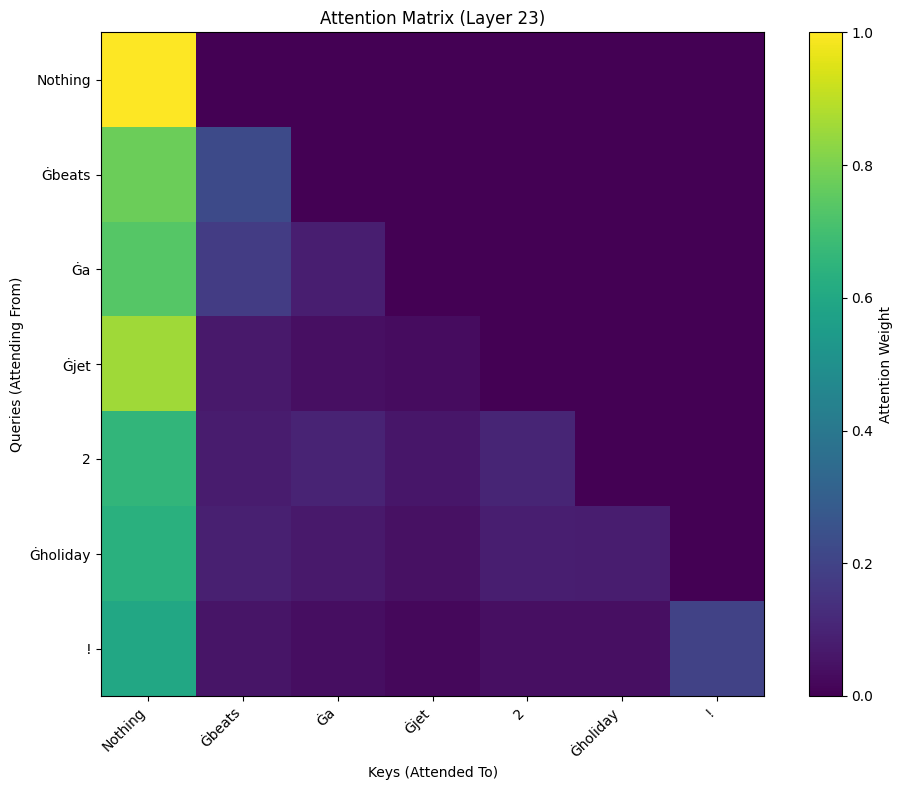

In [19]:
# !pip install torch torchvision transformers matplotlib numpy 
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
import numpy as np

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_attentions=True)

# Set padding token if needed
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token


# Prepare input
text = "Nothing beats a jet2 holiday!"
inputs = tokenizer(text, return_tensors='pt')

# Inference
with torch.no_grad():
    outputs = model(**inputs)
attentions = outputs.attentions

# Extract matrix
for layer in range(len(attentions)):
    attention_matrix = attentions[layer][0].detach().numpy()
    attention_matrix =np.mean(attention_matrix, axis=0)

    # Tokens for labels
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    print(attention_matrix.shape)
    # break
    # Plot
    plt.figure(figsize=(10, 8))
    plt.imshow(attention_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Attention Weight')
    plt.xticks(np.arange(len(tokens)), tokens, rotation=45, ha='right')
    plt.yticks(np.arange(len(tokens)), tokens)
    plt.title(f'Attention Matrix (Layer {len(attentions) + layer})')
    plt.xlabel('Keys (Attended To)')
    plt.ylabel('Queries (Attending From)')
    plt.tight_layout()
    plt.show()
    

## Text Classification 
- classifier : ```BertForSequenceClassification```

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


This lists tokens most attended by [CLS], explaining sentiment.: 
 [('[CLS]', np.float32(0.33085743)), ('[SEP]', np.float32(0.29871815)), ('good', np.float32(0.015080171)), ('is', np.float32(0.031757403)), ('movies', np.float32(0.24232264)), ('this', np.float32(0.08126425))]
:     [('[CLS]', np.float32(0.4956225)), ('[SEP]', np.float32(0.29762486)), ('a', np.float32(0.01802199)), ('appreciate', np.float32(0.014616751)), ('i', np.float32(0.04645554)), ('thank', np.float32(0.08792794)), ('you', np.float32(0.03973051))]


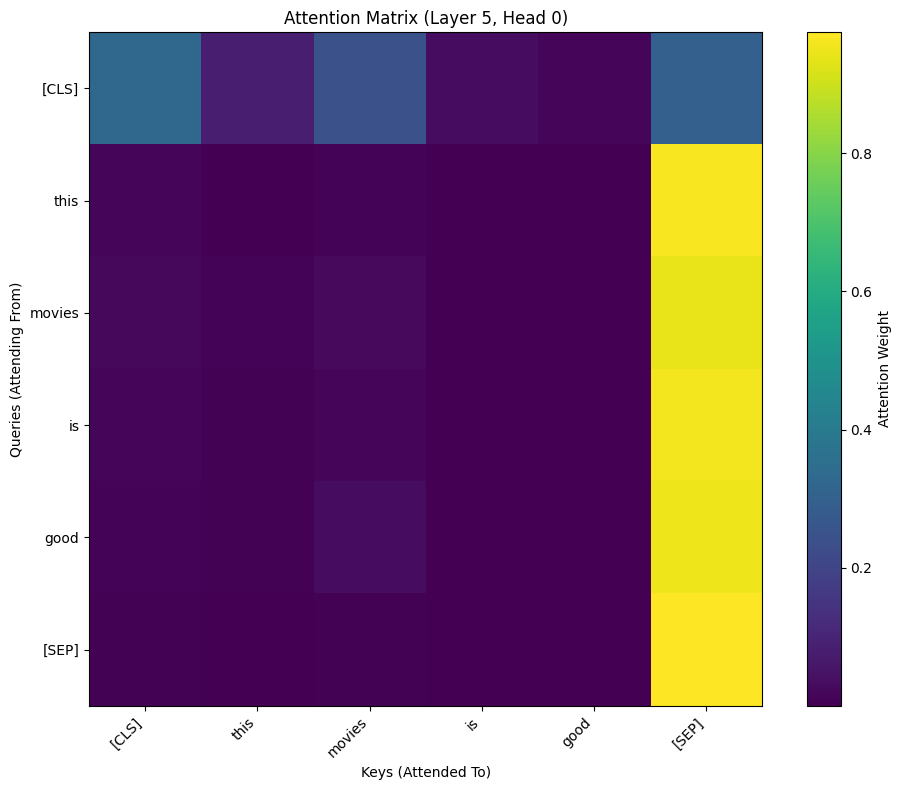

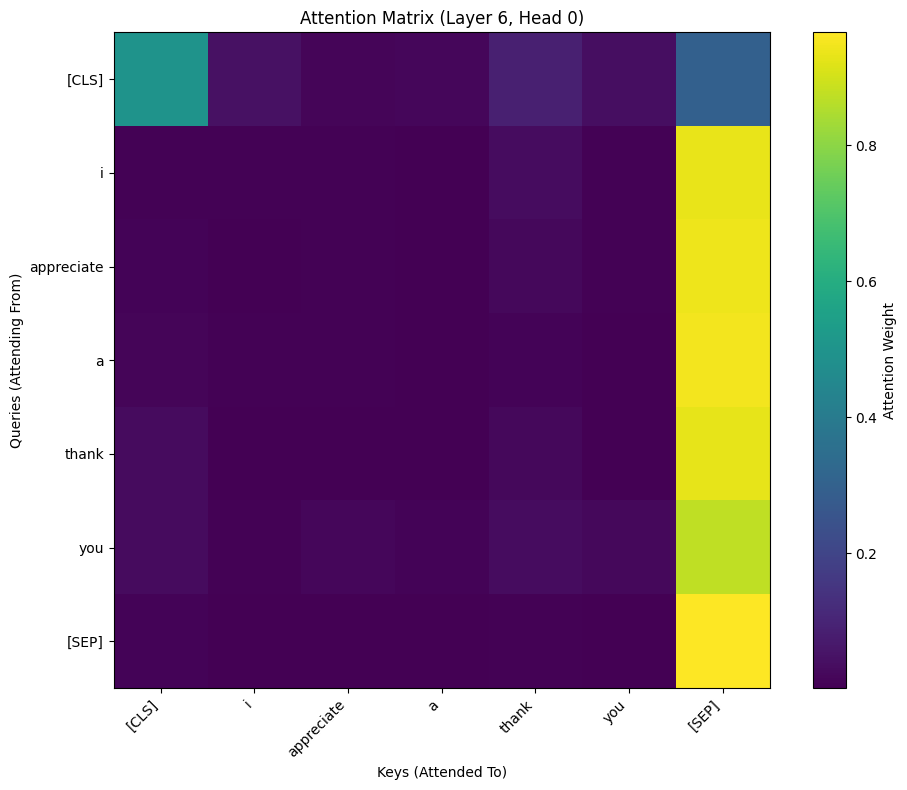

In [7]:
from transformers import BertForSequenceClassification
text1 = "This movies is good"
text2 = "I appreciate a thank you"
classifier = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2,output_attentions=True)

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input1 = tokenizer(text1,return_tensors="pt")
input2 = tokenizer(text2, return_tensors="pt")
tokens1 = tokenizer.convert_ids_to_tokens(input1["input_ids"][0])
tokens2 = tokenizer.convert_ids_to_tokens(input2["input_ids"][0])
with torch.no_grad():
    outputs1 = classifier(**input1)
    outputs2 = classifier(**input2)
layer = -1
head = 0
attentions1 = outputs1.attentions[layer][0][head].detach().numpy()
attentions2 = outputs2.attentions[layer][0][head].detach().numpy()
cls_attention1 = attentions1[0]
cls_attention2 = attentions2[0]
print(f"This lists tokens most attended by [CLS], explaining sentiment.: \n \
{sorted(zip(tokens1,cls_attention1))}\n: \
    {sorted(zip(tokens2,cls_attention2))}")

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(attentions1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Attention Weight')
plt.xticks(np.arange(len(tokens1)), tokens1, rotation=45, ha='right')
plt.yticks(np.arange(len(tokens1)), tokens1)
plt.title(f'Attention Matrix (Layer {len(attentions1) + layer}, Head {head})')
plt.xlabel('Keys (Attended To)')
plt.ylabel('Queries (Attending From)')
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(attentions2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Attention Weight')
plt.xticks(np.arange(len(tokens2)), tokens2, rotation=45, ha='right')
plt.yticks(np.arange(len(tokens2)), tokens2)
plt.title(f'Attention Matrix (Layer {len(attentions2) + layer}, Head {head})')
plt.xlabel('Keys (Attended To)')
plt.ylabel('Queries (Attending From)')
plt.tight_layout()
plt.show()
